In [5]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 27.3 MB/s eta 0:00:00


In [6]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import nltk
from konlpy.tag import Kkma
from konlpy.tag import Twitter
from wordcloud import WordCloud

date='20240624'
news_url = 'https://news.naver.com/main/ranking/popularDay.nhn?date={}'.format(date)
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}
req = requests.get(news_url, headers = headers)

In [7]:
soup = BeautifulSoup(req.text, 'html.parser')
news_titles = soup.select('.rankingnews_box > ul > li > div > a')
crowled_title = []
for i in range(len(news_titles)):
  crowled_title.append(news_titles[i].text)
  print(i + 1, news_titles[i].text)

1 미성년 제자 성폭행한 학원 대표는 ‘유명 배우’… 누구?
2 “팬이 호구냐” 45만원 팬클럽 멤버십 논란…넬 “전액 환불” 사과
3 “결혼해주세요” 미모의 女 이상형은…정체 공개되자 ‘발칵’
4 못 먹어 난리였던 탕후루 “망했습니다” 사장님들 ‘좌절’
5 “개XX 니넨 돈 없어 나 못 친다”…김호중, 몸싸움 과거 영상 파문
6 “돈 있으면 쳐라”...김호중, 건물주 용역과 몸싸움 영상 확산
7 “오래도 숨어 지냈구나? 연봉 8000만원 밀양 가해자, 곧 결혼”...SNS서 신상 또 폭로
8 “계속봐도 웃긴다”…800만 조회수 폭발 경남 양산女의 정체
9 “이혼 전 매일 악몽 꾸고 잠 못자”...조윤희, 이동건과 결혼 생활 고백
10 “SKY 나왔는데 굳이 판검사 왜 해요?”…신임 판사 38%는 ‘이곳’ 출신
11 사채업자의 집요한 협박… 딸의 손톱 끝엔 피가 맺혔다[히어로콘텐츠/트랩]①-上
12 아랫배 더부룩한 복부팽만 지속된다면…‘숨은 살인자’ 난소암 의심해야
13 “끼어들지마”… 美대선 첫 TV토론, 상대 발언땐 ‘마이크 OFF’
14 “싸우는 소리, 아버지 살해된 것 같다” 딸이 신고…父子 숨진 채 발견
15 “화성공장 화재 사망자 22명…연락두절 1명 수색중”
16 ‘오물풍선’ 속에 함께 담겨온 북한의 민낯
17 “또 중국인 관광객?”…‘컵라면 산’ 쌓인 제주 편의점 [잇슈 키워드]
18 “북한, 러시아에 포탄 백만 발 이상 전달”…트럼프 참모 “미군주둔비 올려야”
19 “도망간 뒤 술 마셔라?”…‘김호중 방지법’ 시동 [잇슈 키워드]
20 육군 일병 어제 새벽 경계근무 중 숨진 채 발견
21 '이베이 색 지우기' 돌입한 정용진 회장, 지마켓 구조조정 신호탄일까
22 공정위 "하이브, 방시혁 친족 자료 누락·허위 제출 혐의"
23 [박종면칼럼] 돈으로 본 민희진
24 '나스닥 상장 노크' 네이버웹툰, 기대보다 저평가한 이유는
25 엔비디아, 시총 1위 찍었지만…"브랜드 인지도 여전히 낮다"
26 [헬스+] '통통'했던 부부가 '75일' 만에 '68㎏

In [8]:
title = "".join(crowled_title)
filtered_title = title.replace('.', ' ').replace('"',' ').replace(',',' ').replace("'"," ").replace('·', ' ').replace('=',' ').replace('\n',' ')
filtered_title

'미성년 제자 성폭행한 학원 대표는 ‘유명 배우’… 누구?“팬이 호구냐” 45만원 팬클럽 멤버십 논란…넬 “전액 환불” 사과“결혼해주세요” 미모의 女 이상형은…정체 공개되자 ‘발칵’못 먹어 난리였던 탕후루 “망했습니다” 사장님들 ‘좌절’“개XX 니넨 돈 없어 나 못 친다”…김호중  몸싸움 과거 영상 파문“돈 있으면 쳐라”   김호중  건물주 용역과 몸싸움 영상 확산“오래도 숨어 지냈구나? 연봉 8000만원 밀양 가해자  곧 결혼”   SNS서 신상 또 폭로“계속봐도 웃긴다”…800만 조회수 폭발 경남 양산女의 정체“이혼 전 매일 악몽 꾸고 잠 못자”   조윤희  이동건과 결혼 생활 고백“SKY 나왔는데 굳이 판검사 왜 해요?”…신임 판사 38%는 ‘이곳’ 출신사채업자의 집요한 협박… 딸의 손톱 끝엔 피가 맺혔다[히어로콘텐츠/트랩]①-上아랫배 더부룩한 복부팽만 지속된다면…‘숨은 살인자’ 난소암 의심해야“끼어들지마”… 美대선 첫 TV토론  상대 발언땐 ‘마이크 OFF’“싸우는 소리  아버지 살해된 것 같다” 딸이 신고…父子 숨진 채 발견“화성공장 화재 사망자 22명…연락두절 1명 수색중”‘오물풍선’ 속에 함께 담겨온 북한의 민낯“또 중국인 관광객?”…‘컵라면 산’ 쌓인 제주 편의점 [잇슈 키워드]“북한  러시아에 포탄 백만 발 이상 전달”…트럼프 참모 “미군주둔비 올려야”“도망간 뒤 술 마셔라?”…‘김호중 방지법’ 시동 [잇슈 키워드]육군 일병 어제 새벽 경계근무 중 숨진 채 발견 이베이 색 지우기  돌입한 정용진 회장  지마켓 구조조정 신호탄일까공정위  하이브  방시혁 친족 자료 누락 허위 제출 혐의 [박종면칼럼] 돈으로 본 민희진 나스닥 상장 노크  네이버웹툰  기대보다 저평가한 이유는엔비디아  시총 1위 찍었지만… 브랜드 인지도 여전히 낮다 [헬스+]  통통 했던 부부가  75일  만에  68㎏  감량한 비결은? 군대 가면 쓰질 못하는데~ …138만 유튜버   군인 조롱  영상 논란[속보] 화성 아리셀 공장 화재…사망자 16명 중경상 7명 확인[속보] 화성 

In [9]:
tw = Twitter()
tokens_ko = tw.nouns(filtered_title)
print(tokens_ko)

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['미성년', '제자', '성폭행', '학원', '대표', '유명', '배우', '누구', '팬', '호구', '팬클럽', '멤버십', '논란', '넬', '전액', '환불', '사과', '결혼', '미모', '이상형', '정체', '공개', '발칵', '못', '난리', '탕후루', '장님', '좌절', '개', '니넨', '돈', '나', '못', '김호중', '몸싸움', '과거', '영상', '파문', '돈', '김호중', '건물', '주', '용역', '몸싸움', '영상', '확산', '연봉', '밀양', '가해자', '곧', '결혼', '신상', '또', '폭로', '계속', '회수', '폭발', '경남', '양산', '의', '정체', '이혼', '전', '매일', '악몽', '잠', '조윤희', '이동건', '결혼', '생활', '고백', '굳이', '판검사', '왜', '해', '신임', '판사', '곳', '출신', '사채', '업자', '협박', '딸', '손톱', '끝', '피', '맺혔다', '히어로', '콘텐츠', '트랩', '배', '복부팽', '지속', '살인자', '난소암', '의심', '대선', '첫', '토론', '상대', '발언', '땐', '마이크', '소리', '아버지', '살해', '것', '딸', '신고', '채', '발견', '화성공장', '화재', '사망자', '명', '연락', '두절', '명', '수색', '물풍선', '속', '온', '북한', '민낯', '또', '중국인', '관광객', '컵라면', '산', '제주', '편의점', '잇슈', '키', '워드', '북한', '러시아', '포탄', '백만', '발', '이상', '전달', '트럼프', '참모', '미군', '주둔', '비', '뒤', '술', '김호중', '방지법', '시동', '잇슈', '키', '워드', '육군', '일병', '어제', '새벽', '경계', '근무', '중', '채', '발견', '이베이', '색', '돌입', '정용진', '회

In [11]:
ko = nltk.Text(tokens_ko, name = '기사 내 명사')
ko.tokens
ko.vocab()

FreqDist({'명': 71, '화재': 50, '화성': 48, '공장': 45, '발견': 29, '속보': 27, '사망': 25, '아리': 19, '김호중': 18, '영상': 18, ...})

In [12]:
new_ko = []
for word in ko:
  if len(word) > 1 and word != '단독' and word != ' ':
    new_ko.append(word)
new_ko

['미성년',
 '제자',
 '성폭행',
 '학원',
 '대표',
 '유명',
 '배우',
 '누구',
 '호구',
 '팬클럽',
 '멤버십',
 '논란',
 '전액',
 '환불',
 '사과',
 '결혼',
 '미모',
 '이상형',
 '정체',
 '공개',
 '발칵',
 '난리',
 '탕후루',
 '장님',
 '좌절',
 '니넨',
 '김호중',
 '몸싸움',
 '과거',
 '영상',
 '파문',
 '김호중',
 '건물',
 '용역',
 '몸싸움',
 '영상',
 '확산',
 '연봉',
 '밀양',
 '가해자',
 '결혼',
 '신상',
 '폭로',
 '계속',
 '회수',
 '폭발',
 '경남',
 '양산',
 '정체',
 '이혼',
 '매일',
 '악몽',
 '조윤희',
 '이동건',
 '결혼',
 '생활',
 '고백',
 '굳이',
 '판검사',
 '신임',
 '판사',
 '출신',
 '사채',
 '업자',
 '협박',
 '손톱',
 '맺혔다',
 '히어로',
 '콘텐츠',
 '트랩',
 '복부팽',
 '지속',
 '살인자',
 '난소암',
 '의심',
 '대선',
 '토론',
 '상대',
 '발언',
 '마이크',
 '소리',
 '아버지',
 '살해',
 '신고',
 '발견',
 '화성공장',
 '화재',
 '사망자',
 '연락',
 '두절',
 '수색',
 '물풍선',
 '북한',
 '민낯',
 '중국인',
 '관광객',
 '컵라면',
 '제주',
 '편의점',
 '잇슈',
 '워드',
 '북한',
 '러시아',
 '포탄',
 '백만',
 '이상',
 '전달',
 '트럼프',
 '참모',
 '미군',
 '주둔',
 '김호중',
 '방지법',
 '시동',
 '잇슈',
 '워드',
 '육군',
 '일병',
 '어제',
 '새벽',
 '경계',
 '근무',
 '발견',
 '이베이',
 '돌입',
 '정용진',
 '회장',
 '지마켓',
 '구조조정',
 '신호탄',
 '공정위',
 '하이브',
 '방시혁',
 '친족',
 '자료',
 '누락',
 '허위'

In [13]:
ko = nltk.Text(new_ko, name = '기사 내 명사 두 번째')
ko.tokens
ko.vocab()
data = ko.vocab().most_common(150)
data = dict(data)
data

{'화재': 50,
 '화성': 48,
 '공장': 45,
 '발견': 29,
 '속보': 27,
 '사망': 25,
 '아리': 19,
 '김호중': 18,
 '영상': 18,
 '논란': 17,
 '시신': 16,
 '사망자': 15,
 '아들': 14,
 '현장': 14,
 '일병': 11,
 '사단': 11,
 '군인': 10,
 '우리': 10,
 '대표': 9,
 '몸싸움': 9,
 '실종자': 9,
 '여구': 9,
 '음주': 9,
 '이재명': 9,
 '리튬전지': 9,
 '사과': 8,
 '공개': 8,
 '한동훈': 8,
 '밀양': 7,
 '살해': 7,
 '육군': 7,
 '조롱': 7,
 '사건': 7,
 '일차전지': 7,
 '사퇴': 7,
 '결혼': 6,
 '폭발': 6,
 '수색': 6,
 '이유': 6,
 '군대': 6,
 '가면': 6,
 '남성': 6,
 '배터리': 6,
 '뺑소니': 6,
 '가능성': 6,
 '가장': 6,
 '추가': 6,
 '성폭행': 5,
 '가해자': 5,
 '연락': 5,
 '두절': 5,
 '관광객': 5,
 '제주': 5,
 '편의점': 5,
 '유튜버': 5,
 '사고': 5,
 '무슨': 5,
 '김건희': 5,
 '체육교사': 5,
 '유튜브': 5,
 '의사': 5,
 '피해': 5,
 '실종': 5,
 '여름': 5,
 '민주당': 5,
 '참사': 5,
 '학원': 4,
 '누구': 4,
 '정체': 4,
 '아버지': 4,
 '물풍선': 4,
 '북한': 4,
 '근무': 4,
 '혐의': 4,
 '중국': 4,
 '반대': 4,
 '쓰레기': 4,
 '한번': 4,
 '한국': 4,
 '투자': 4,
 '병원': 4,
 '생각': 4,
 '여명': 4,
 '진짜': 4,
 '추정': 4,
 '뭐길': 4,
 '부모': 4,
 '의혹': 4,
 '집값': 4,
 '붕괴': 4,
 '욕설': 4,
 '시장': 4,
 '현대차': 4,
 '인하': 4,
 '아파트': 4,
 '경기

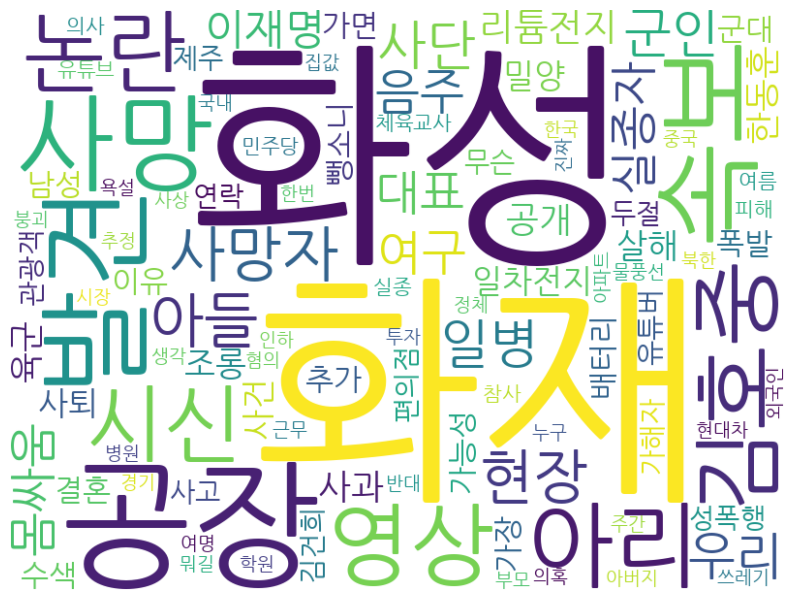

In [15]:
wordcloud = WordCloud().generate(filtered_title)

font = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wc = WordCloud(font_path = font,
               background_color = 'white',
               max_words=100,
               max_font_size = 250,
               width = 800,
               height = 600)
wc = wc.generate_from_frequencies(data)

plt.figure(figsize = (10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 멜론차트 크롤링

In [20]:
from bs4 import BeautifulSoup as bs
import requests as req
import pandas as pd

In [21]:
url = 'https://www.melon.com/chart/index.htm'
header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}

res = req.get(url, headers = header)
res

<Response [200]>

In [22]:
html = bs(res.text, 'lxml')
html

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;TOP100&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
<meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="멜론" propert

In [24]:
song = html.select('.ellipsis.rank01>span>a')

song_list = [i.text for i in song]
song_list

['Small girl (feat. 도경수(D.O.))',
 'Supernova',
 'How Sweet',
 '소나기',
 'Bubble Gum',
 'Armageddon',
 '고민중독',
 'SPOT! (feat. JENNIE)',
 '해야 (HEYA)',
 'Magnetic',
 '나는 아픈 건 딱 질색이니까',
 '한 페이지가 될 수 있게',
 '첫 만남은 계획대로 되지 않아',
 'Supernatural',
 '천상연',
 '예뻤어',
 'Boom Boom Bass',
 '미안해 미워해 사랑해',
 '에피소드',
 '사랑은 늘 도망가',
 'Welcome to the Show',
 '온기',
 'SHEESH',
 '우리들의 블루스',
 'Home',
 'Love wins all',
 '모래 알갱이',
 '비의 랩소디',
 '다시 만날 수 있을까',
 'Hype Boy',
 '이제 나만 믿어요',
 'Do or Die',
 '오래된 노래',
 'Cosmic',
 '무지개',
 'London Boy',
 'Polaroid',
 '밤양갱',
 '슬픈 초대장',
 '그대만 있다면 (여름날 우리 X 너드커넥션 (Nerd Connection))',
 '인생찬가',
 '네가 내 마음에 자리 잡았다 (Into You)',
 'I AM',
 'Seven (feat. Latto) - Clean Ver.',
 'ETA',
 'To. X',
 'Drama',
 'Super Shy',
 '연애편지',
 '그랬나봐',
 '헤어지자 말해요',
 'MAESTRO',
 '청혼하지 않을 이유를 못 찾았어',
 'Right Now',
 'WAY 4 LUV',
 'Accendio',
 'Love 119',
 '내가 S면 넌 나의 N이 되어줘',
 'Run Run',
 'Attention',
 '봄눈',
 'Ditto',
 'Get A Guitar',
 '보금자리',
 '너의 모든 순간',
 '사랑인가 봐',
 'Girls Never Die',
 'Spicy',
 'Impossible'

In [25]:
singer = html.select('.ellipsis.rank02>a')

singer_list = [i.text for i in singer]
singer_list

['이영지',
 'aespa',
 'NewJeans',
 '이클립스 (ECLIPSE)',
 'NewJeans',
 'aespa',
 'QWER',
 '지코 (ZICO)',
 'IVE (아이브)',
 '아일릿(ILLIT)',
 '(여자)아이들',
 'DAY6 (데이식스)',
 'TWS (투어스)',
 'NewJeans',
 '이창섭',
 'DAY6 (데이식스)',
 'RIIZE',
 'Crush',
 '이무진',
 '임영웅',
 'DAY6 (데이식스)',
 '임영웅',
 'BABYMONSTER',
 '임영웅',
 '임영웅',
 '아이유',
 '임영웅',
 '임재현',
 '임영웅',
 'NewJeans',
 '임영웅',
 '임영웅',
 '허각',
 '임한별',
 '이무진',
 '이진성 (먼데이 키즈)',
 '김희재',
 '#안녕',
 'Red Velvet (레드벨벳)',
 '임영웅',
 '임영웅',
 '임영웅',
 '비비 (BIBI)',
 '순순희 (지환)',
 '너드커넥션 (Nerd Connection)',
 '임영웅',
 '엔플라잉 (N.Flying)',
 'IVE (아이브)',
 '정국',
 'NewJeans',
 '태연 (TAEYEON)',
 'aespa',
 'NewJeans',
 '임영웅',
 '유회승 (엔플라잉)',
 '박재정',
 '세븐틴 (SEVENTEEN)',
 '이무진',
 'NewJeans',
 'PLAVE',
 'IVE (아이브)',
 'RIIZE',
 'TWS (투어스)',
 '이클립스 (ECLIPSE)',
 'NewJeans',
 '10CM',
 'NewJeans',
 'RIIZE',
 '임영웅',
 '성시경',
 '멜로망스',
 'tripleS (트리플에스)',
 'aespa',
 'RIIZE',
 '하동균',
 '범진',
 'RIIZE',
 '부석순 (SEVENTEEN)',
 'KISS OF LIFE',
 'NewJeans',
 '아일릿(ILLIT)',
 'PLAVE',
 'VIVIZ (비비지)',
 'LE SSERAFIM (르세라핌

In [26]:
rank_list = [i+1 for i in range(len(song_list))]
print(len(rank_list))
print(len(song_list))
print(len(singer_list))

100
100
106


In [31]:
top_100 = {'순위':rank_list, '가수':singer_list[:100], '곡명':song_list}
print(len(top_100))
top_100_df = pd.DataFrame(top_100)
top_100_df

3


,순위,가수,곡명
0,1,이영지,Small girl (feat. 도경수(D.O.))
1,2,aespa,Supernova
2,3,NewJeans,How Sweet
3,4,이클립스 (ECLIPSE),소나기
4,5,NewJeans,Bubble Gum
...,...,...,...
95,96,AKMU (악뮤),"모든 날, 모든 순간 (Every day, Every Moment)"
96,97,세븐틴 (SEVENTEEN),다정히 내 이름을 부르면
97,98,방탄소년단,손오공
98,99,태연 (TAEYEON),취중고백
